In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   
...             ...     ...        ...        ...          ...       ...   
7/1/20         3753   34463      19011       2519         6736     20262   
7/2/20         4023   35237      20072       2519         7000     21120   
7/3/20         4311   35995      21293       2519         7267     22116   
7/4/20         4621   36983      22501       2519         7507     22921   
7/5/20         4996   38149      23248       2519         7777     23943   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    1        0                    0     0  
3/2/20                    1        0                    0     0  
3/3/20                    1        0                    0     0  
3/4/20                    1        0                    0     0  
...                     ...      ...                  ...   ...  
7/1/20                33387      707                  130  2348  
7/2/20                34197      715                  130  2353  
7/3/20                35148      721                  130  2361  
7/4/20                36184      728                  130  2369  
7/5/20                37425      732                  133  2372  

[128 rows x 10 columns]

In [4]:
deaths.head()

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    0        0                    0     0  
3/2/20                    0        0                    0     0  
3/3/20                    0        0                    0     0  
3/4/20                    0        0                    0     0

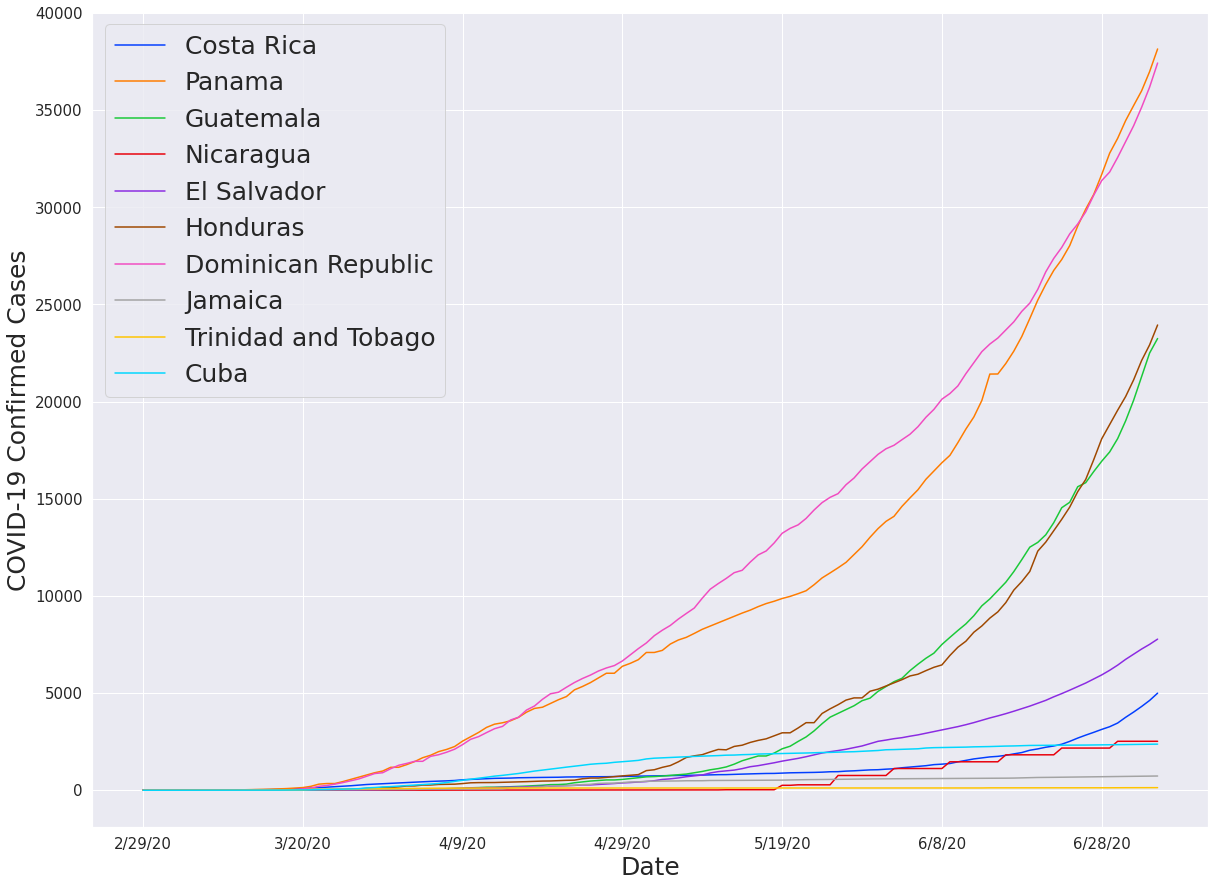

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

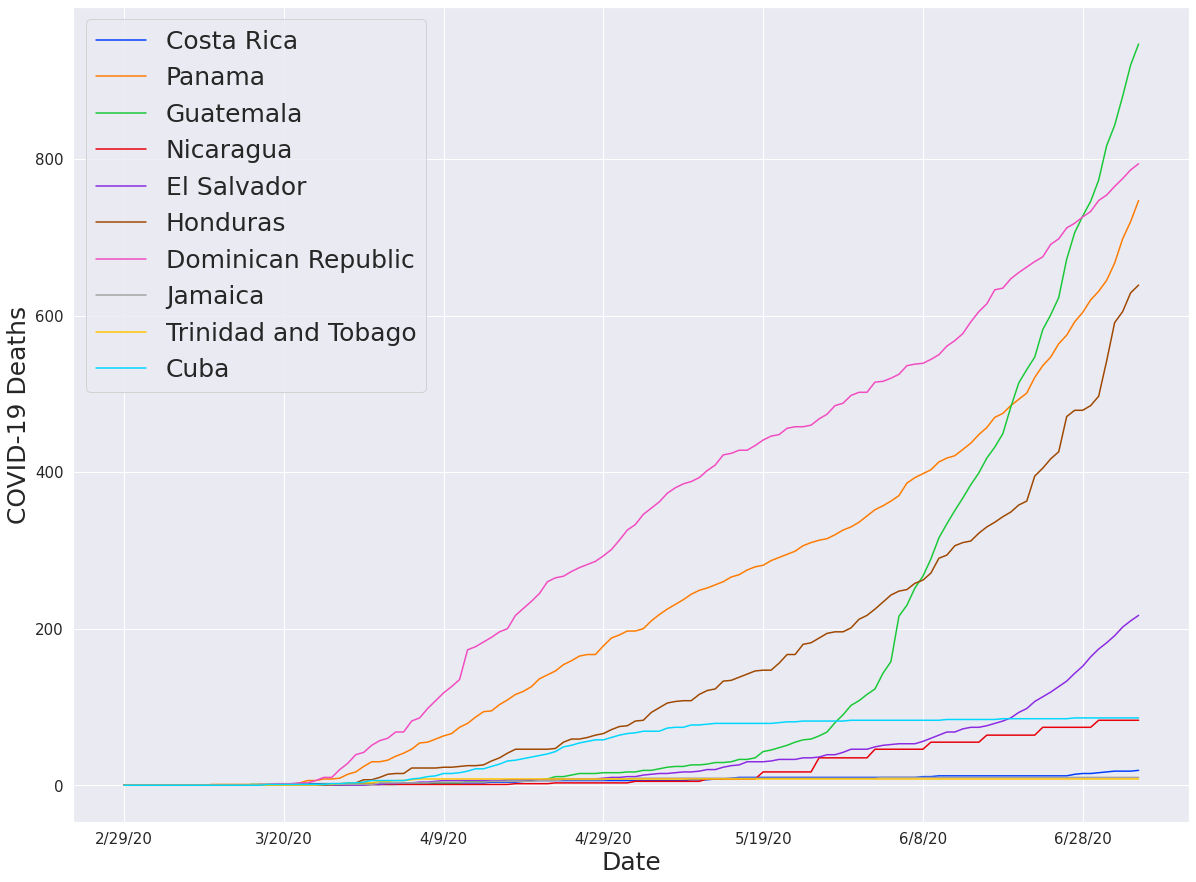

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
3/1/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/2/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/3/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/4/20         0.0     0.0        0.0        0.0          0.0       0.0   
3/5/20         0.0     0.0        0.0        0.0          0.0       0.0   
...            ...     ...        ...        ...          ...       ...   
7/1/20       294.0   913.0      915.0        0.0        298.0     704.0   
7/2/20       270.0   774.0     1061.0        0.0        264.0     858.0   
7/3/20       288.0   758.0     1221.0        0.0        267.0     996.0   
7/4/20       310.0   988.0     1208.0        0.0        240.0     805.0   
7/5/20       375.0  1166.0      747.0        0.0        270.0    1022.0   

        Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
3/1/20                 1.0      0.0                  0.0   0.0  
3/2/20                 0.0      0.0                  0.0   0.0  
3/3/20                 0.0      0.0                  0.0   0.0  
3/4/20                 0.0      0.0                  0.0   0.0  
3/5/20                 0.0      0.0                  0.0   0.0  
...                    ...      ...                  ...   ...  
7/1/20               819.0      5.0                  0.0   7.0  
7/2/20               810.0      8.0                  0.0   5.0  
7/3/20               951.0      6.0                  0.0   8.0  
7/4/20              1036.0      7.0                  0.0   8.0  
7/5/20              1241.0      4.0                  3.0   3.0  

[127 rows x 10 columns]

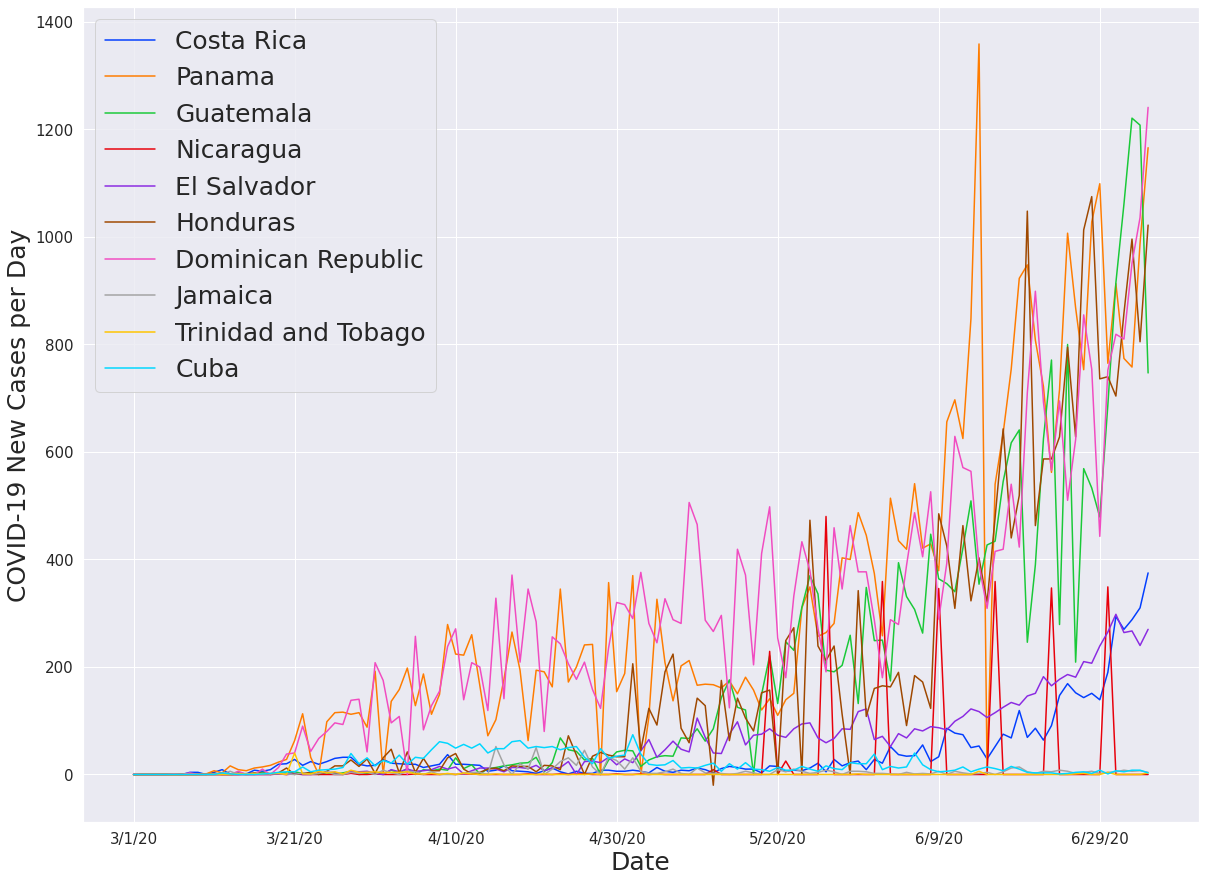

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

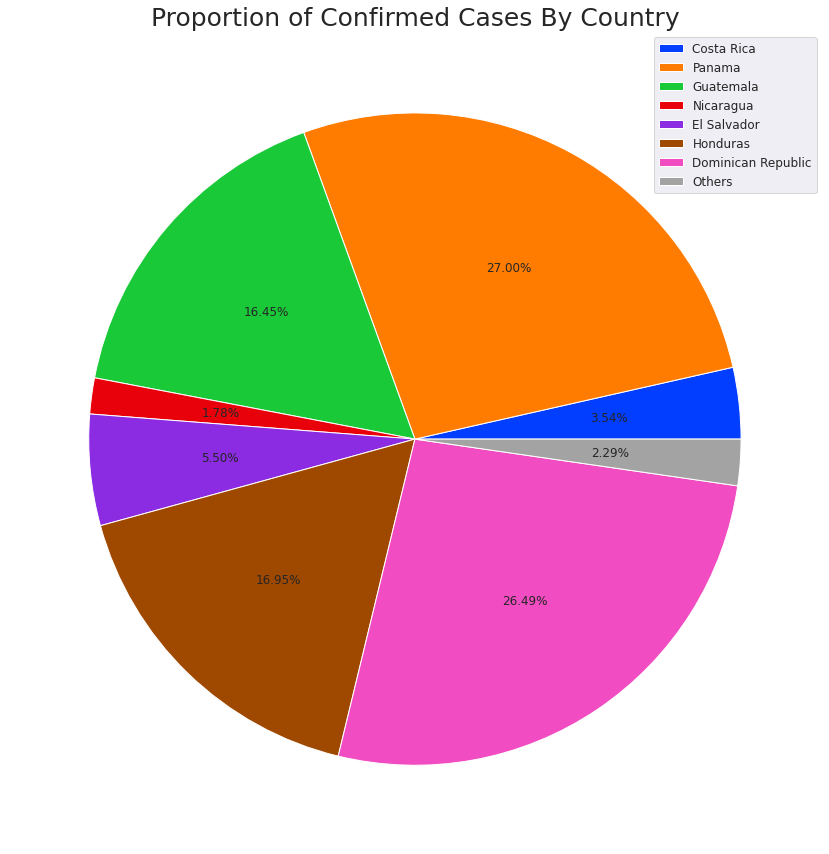

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

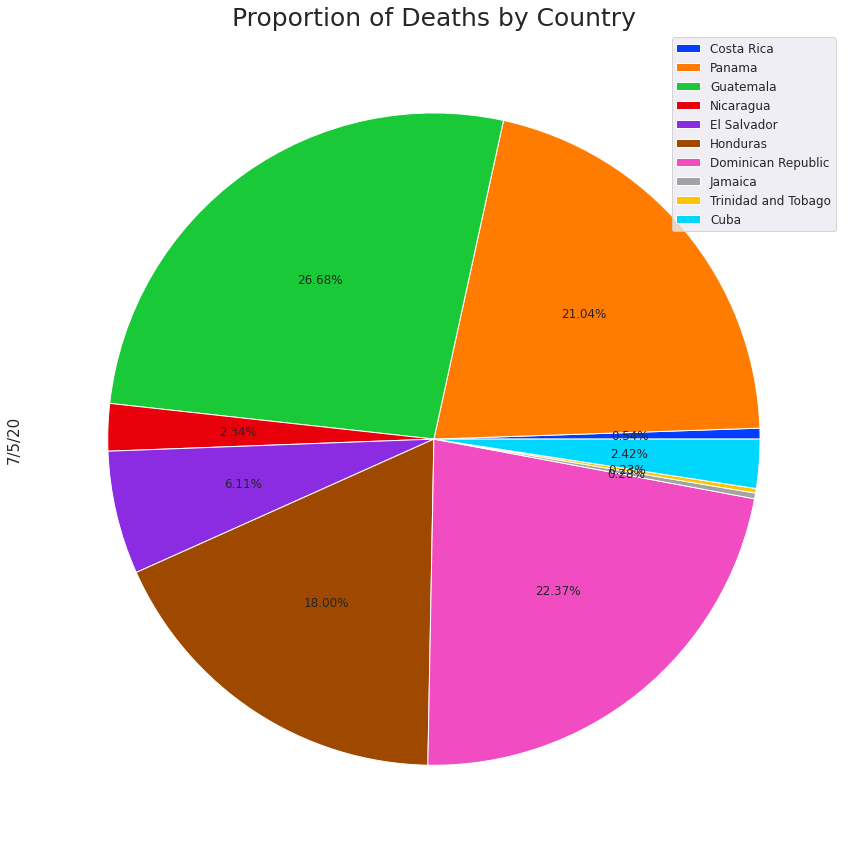

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

Costa Rica    Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20    0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/1/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/2/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/3/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/4/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
...             ...       ...        ...        ...          ...       ...   
7/1/20     1.084996  1.027213   1.050564        1.0     1.046288  1.035996   
7/2/20     1.071942  1.022459   1.055810        1.0     1.039192  1.042345   
7/3/20     1.071588  1.021511   1.060831        1.0     1.038143  1.047159   
7/4/20     1.071909  1.027448   1.056732        1.0     1.033026  1.036399   
7/5/20     1.081151  1.031528   1.033199        1.0     1.035966  1.044588   

         Dominican Republic   Jamaica  Trinidad and Tobago      Cuba  
2/29/20            0.000000  0.000000             0.000000  0.000000  
3/1/20             0.000000  0.000000             0.000000  0.000000  
3/2/20             1.000000  0.000000             0.000000  0.000000  
3/3/20             1.000000  0.000000             0.000000  0.000000  
3/4/20             1.000000  0.000000             0.000000  0.000000  
...                     ...       ...                  ...       ...  
7/1/20             1.025147  1.007123             1.000000  1.002990  
7/2/20             1.024261  1.011315             1.000000  1.002129  
7/3/20             1.027809  1.008392             1.000000  1.003400  
7/4/20             1.029475  1.009709             1.000000  1.003388  
7/5/20             1.034297  1.005495             1.023077  1.001266  

[128 rows x 10 columns]

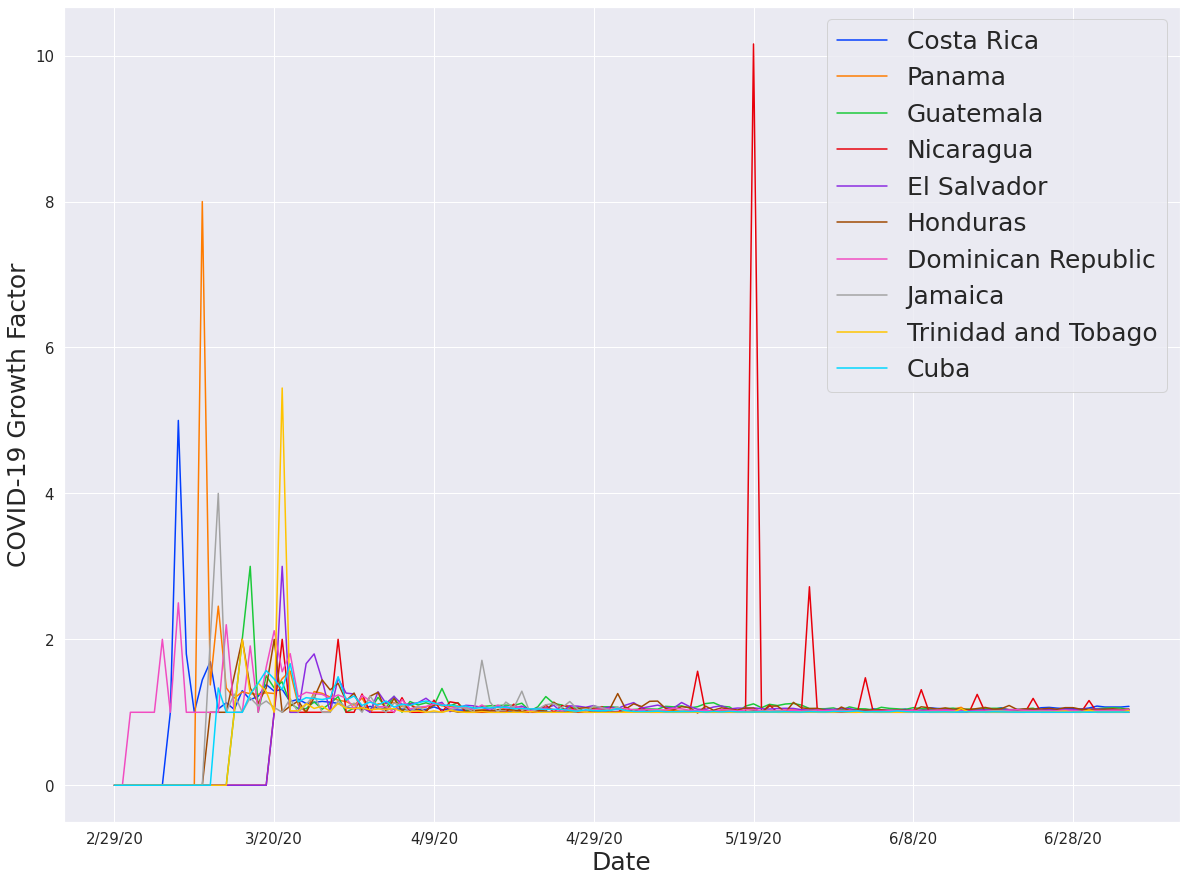

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  128.000000  128.000000  128.000000  128.000000   128.000000   
mean     1.036759    1.044643    0.975311    0.971915     0.927231   
std      0.443063    0.707210    0.409208    0.929616     0.447873   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      1.010294    1.020004    1.032167    1.000000     1.027580   
50%      1.028603    1.032504    1.054425    1.000000     1.039135   
75%      1.056158    1.068475    1.089626    1.000000     1.073425   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  128.000000          128.000000  128.000000           128.000000   
mean     0.989784            1.087628    0.976183             0.940691   
std      0.350760            0.277354    0.425733             0.529965   
min      0.000000            0.000000    0.000000             0.000000   
25%      1.020761            1.017828    1.000000             1.000000   
50%      1.042703            1.028771    1.007383             1.000000   
75%      1.075794            1.051328    1.048125             1.008639   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  128.000000  
mean     0.957078  
std      0.342226  
min      0.000000  
25%      1.003057  
50%      1.008023  
75%      1.059892  
max      1.666667

In [17]:
growth_df.mean()

Costa Rica             1.036759
Panama                 1.044643
Guatemala              0.975311
Nicaragua              0.971915
El Salvador            0.927231
Honduras               0.989784
Dominican Republic     1.087628
Jamaica                0.976183
Trinidad and Tobago    0.940691
Cuba                   0.957078
dtype: float64

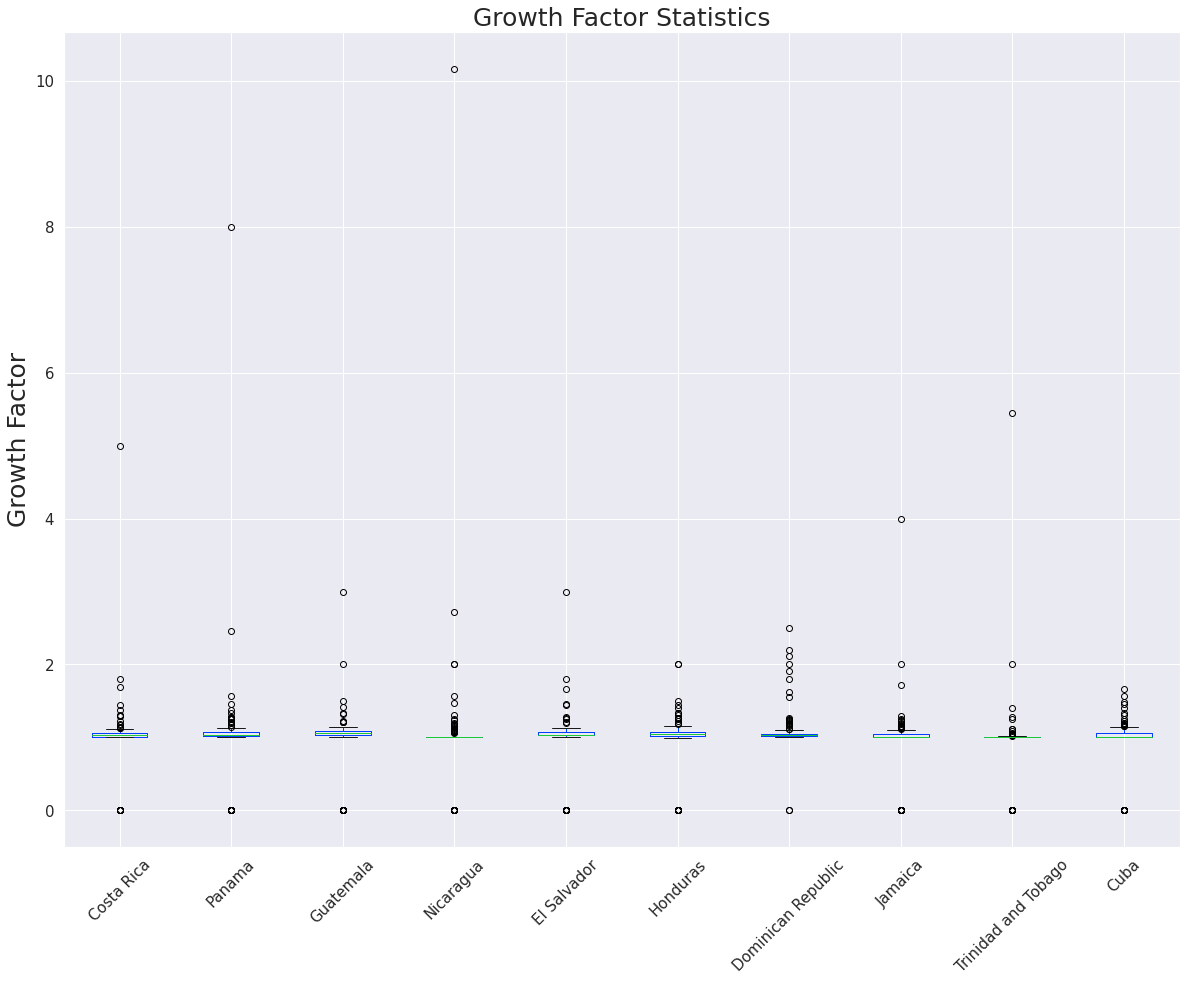

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

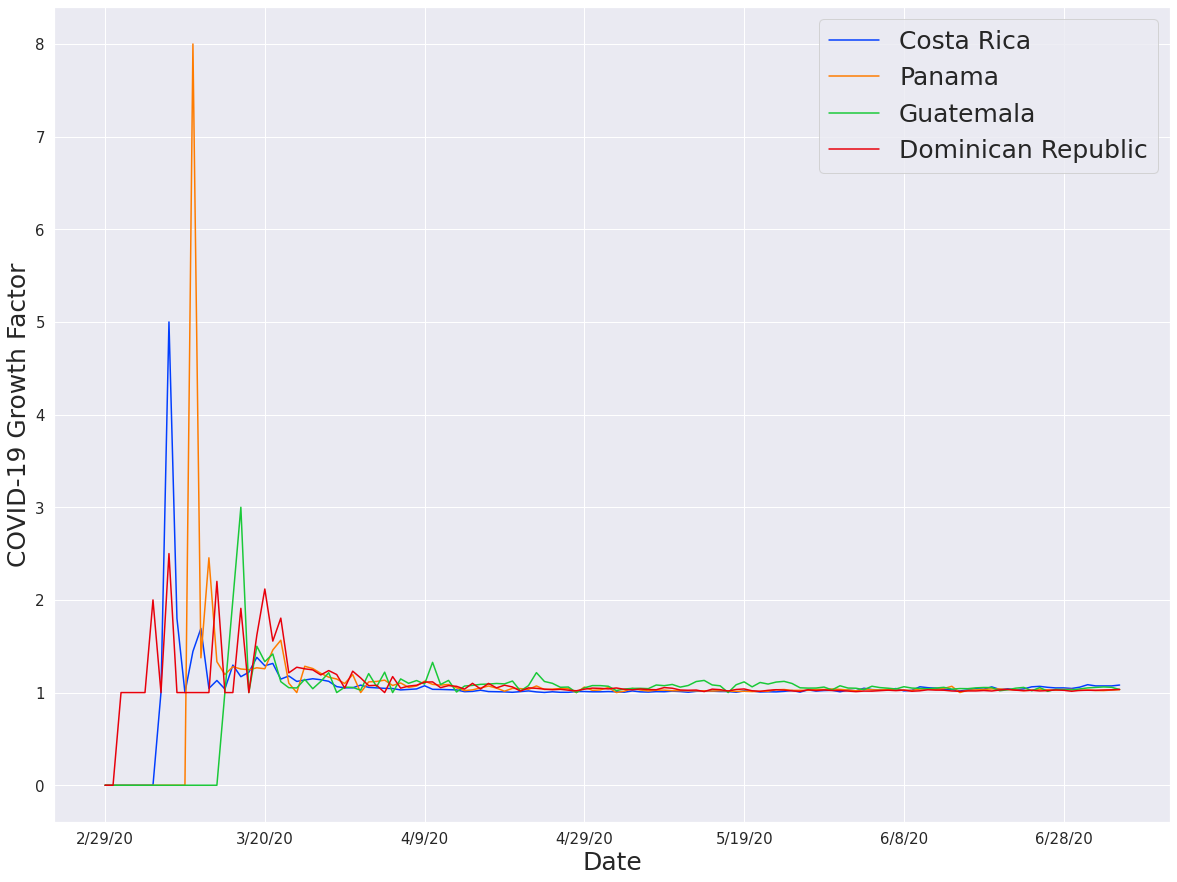

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  121.000000  117.000000  113.000000  108.000000   108.000000   
mean     1.096737    1.142858    1.104777    1.151899     1.098941   
std      0.376069    0.659061    0.213470    0.903579     0.218223   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      1.011364    1.023607    1.043372    1.000000     1.032726   
50%      1.029817    1.033627    1.058824    1.000000     1.048239   
75%      1.058122    1.071562    1.093617    1.000000     1.084064   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  116.000000          126.000000  116.000000           113.000000   
mean     1.092175            1.104892    1.077167             1.065561   
std      0.151885            0.242752    0.300730             0.429225   
min      0.990476            1.000000    1.000000             1.000000   
25%      1.029490            1.018585    1.002911             1.000000   
50%      1.044878            1.029145    1.008773             1.000000   
75%      1.083534            1.052478    1.061397             1.008929   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  115.000000  
mean     1.065269  
std      0.119207  
min      1.000000  
25%      1.004202  
50%      1.010682  
75%      1.070699  
max      1.666667

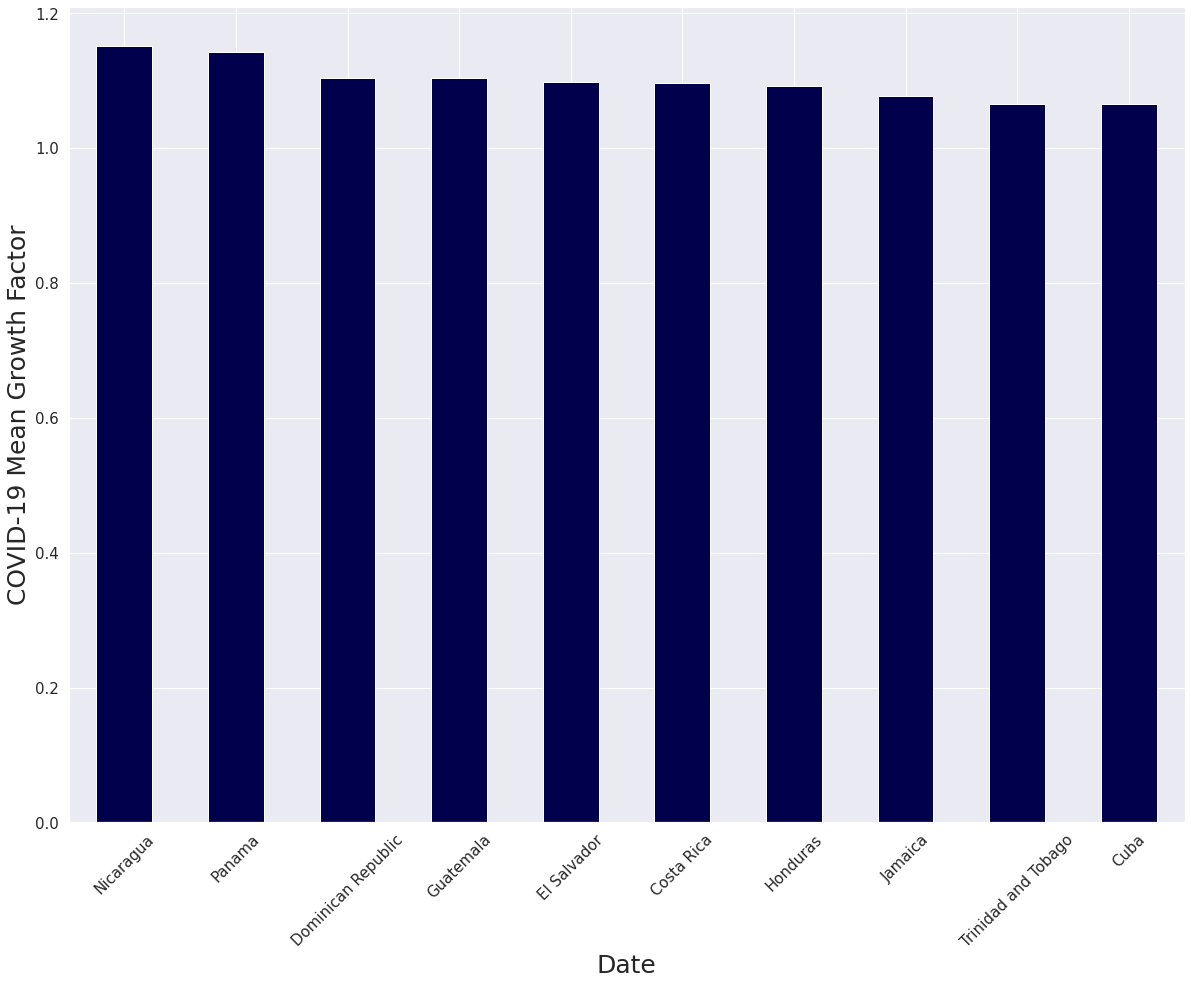

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

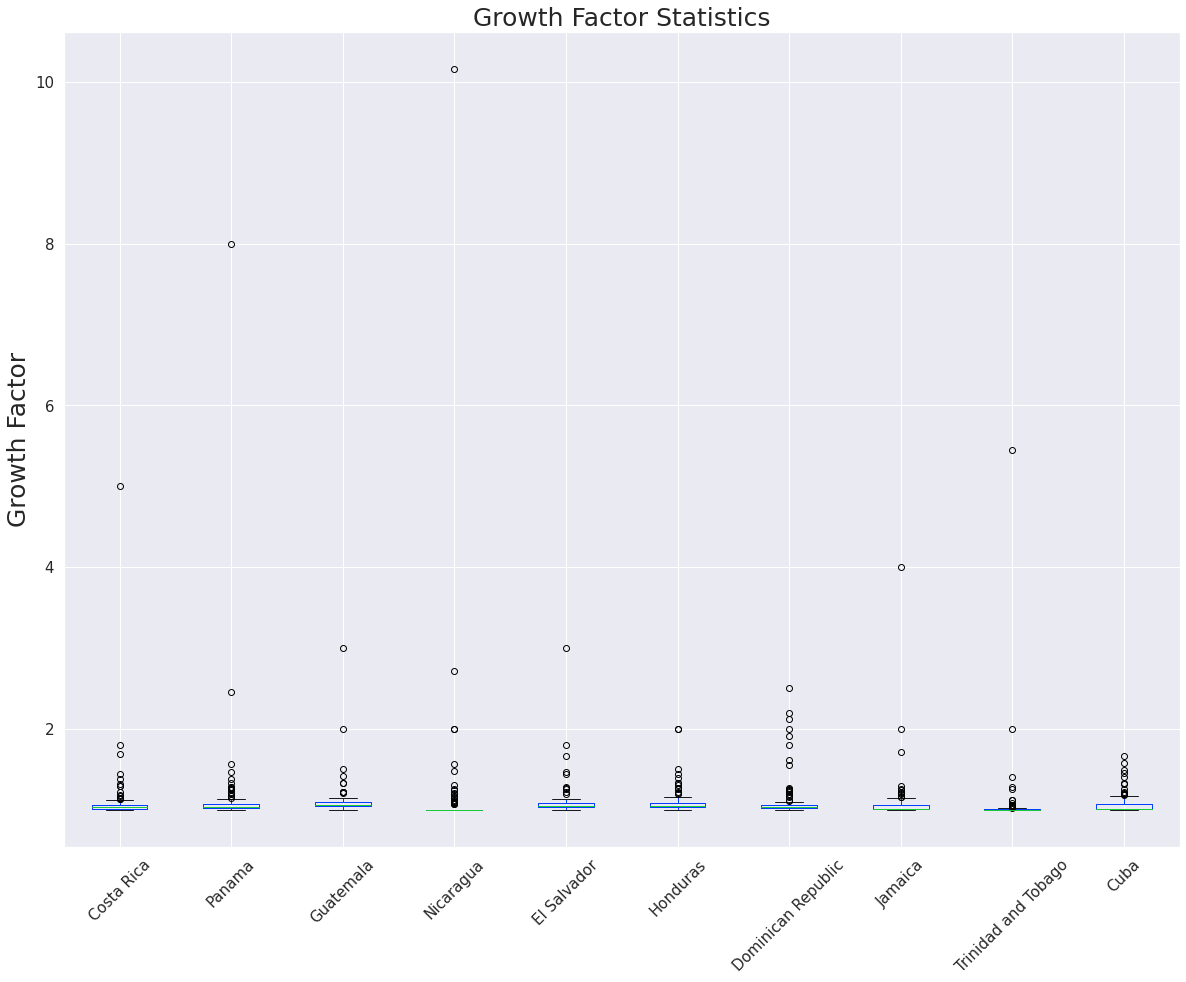

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

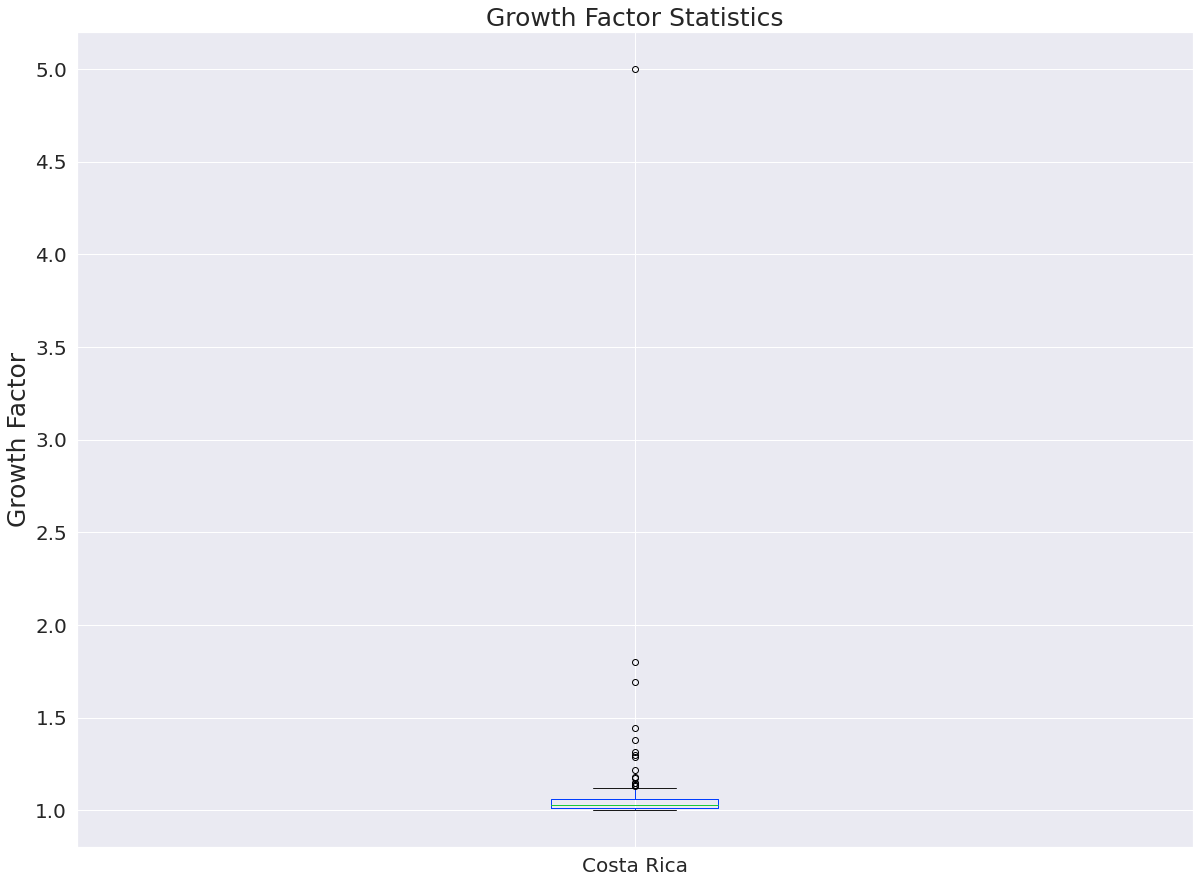

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()